In [104]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import math, random
from matplotlib import pyplot as plt, gridspec
import seaborn as sns
import statsmodels.api as sm
import itertools

%matplotlib inline

# Chapter 8 - Comparisons

## Formulas

**Two-sample Pooled T-test**

T-statistic for comparing two population means

$$t=\frac{\bar{y}_1 - \bar{y}_2}{S\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

Where S is the pooled sample standard deviation calculated as:

$$S = \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$$

Where the t-statistic has $n_1+n_2-2$ degrees of freedom

**Two-sample Unpooled T-test**

T-statistic for comparing two populations means

$$t = \frac{\bar{y}_1-\bar{y}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

with degrees for freedom equal to

$$v = \frac{\left ( \frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right ) ^2}{\frac{\left ( \frac{s_1^2}{n_1}\right ) ^2}{n_1-1}+\frac{\left ( \frac{s_2^2}{n_2}\right ) ^2}{n_2-1}}$$

**When to pool standard deviation?**

As a rule of thumb, when the standard deviation of one sample is not twice as large as the other sample

**Paired samples**

$$t = \frac{\bar{y}_1-\bar{y}_2}{\frac{s_d}{\sqrt{n}}}$$
or
$$t = \frac{\bar{y}_d}{\frac{s_d}{\sqrt{n}}}$$

**Comparing two proportions**

Z statistic 

$$z = \frac{p_1 - p_2}{\sqrt{\bar{p}(1-\bar{p})}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

where $\bar{p}$ is the pooled sample proportion defined as

$$\bar{p} = \frac{n_1P_1+n_2P_2}{n_1+n_2}$$

The expected number of events and non-events: $n_1\bar{p}$, $n_2\bar{p}$, $n_1(1-\bar{p})$, $n_2(1-\bar{p})$ should be greater than five for the formulas to apply.


**Paired proportions**

McNemar test
$$z = \frac{m_1-m_2}{\sqrt{m_1+m_2}}$$

where $m_1$ and $m_2$ are the discordant pairs of each type

## Notes

### Two-sample pooled t-test

Two groups of anorexic women. Data provided is before gain-weight training. Compare both groups to ensure compatibility.

Family therapy: 38.0 37.8 39.0 37.4 39.3 36.1 34.9 42.7 33.3 36.5 37.0 37.3 35.2 37.9 40.8 39.0 39.6
Controls:	36.6 40.6 41.7 33.6 35.4 40.1 39.6 34.1 36.6 35.6 35.2 40.2 36.9 35.4 32.0 35.1 38.7 39.0 38.2 36.2 38.8 38.3 36.1 35.2 32.8 40.4

In [3]:
ft_str = '38.0 37.8 39.0 37.4 39.3 36.1 34.9 42.7 33.3 36.5 37.0 37.3 35.2 37.9 40.8 39.0 39.6'
ft = np.array([float(i) for i in ft_str.split(' ')])
c_str = '36.6 40.6 41.7 33.6 35.4 40.1 39.6 34.1 36.6 35.6 35.2 40.2 36.9 35.4 32.0 35.1 38.7 39.0 38.2 36.2 38.8 38.3 36.1 35.2 32.8 40.4'
c = np.array([float(i) for i in c_str.split(' ')])

Confidence interval
$$\left ( \bar{y}-t_{n-1} \frac{s}{\sqrt{n}},\bar{y}+t_{n-1} \frac{s}{\sqrt{n}} \right )$$

In [4]:
# Calculate confidence intervals
ft_diff = -stats.t.ppf(q=0.225, df=ft.shape[0]-1)*(ft.std(ddof=1)/(ft.shape[0]**(1/2)))
ft_ci = [ft.mean()-ft_diff,ft.mean()+ft_diff]
c_diff = -stats.t.ppf(q=0.225, df=c.shape[0]-1)*(c.std(ddof=1)/(c.shape[0]**(1/2)))
c_ci = [c.mean()-c_diff,c.mean()+c_diff]

# Create points for graph
sx = [1,1,2,2]
sy = ft_ci+c_ci

sx, sy

([1, 1, 2, 2],
 [37.326613584747264, 38.17926876819391, 36.62517884177586, 37.40559038899336])

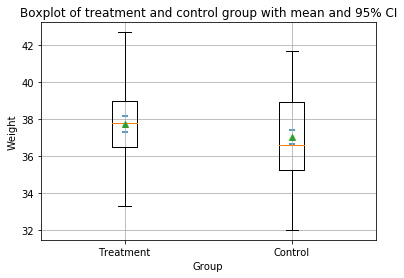

In [5]:
# boxplots of control and family treatment groups
plt.boxplot([ft,c], showmeans=True)
plt.xticks(ticks=[1,2],labels=['Treatment','Control'])
plt.scatter(x=sx, y=sy, marker='_')
plt.grid()
plt.title('Boxplot of treatment and control group with mean and 95% CI')
plt.xlabel('Group')
plt.ylabel('Weight');


In [6]:
# Testing assumption of normality with a normal scores plot

# Calculating the residuals by substracting the mean from the observation for 
# each group then concatenating the data
residuals = np.sort(np.concatenate([(ft-ft.mean()),(c-c.mean())]))

# Calculating the scores: calculating the z-scores for the tail areas 1/(n+1), 
# 2/(n+1), etc. where n is the number of observations
scores = stats.norm.ppf(q=np.arange(1,residuals.shape[0]+1,1)/(residuals.shape[0]+1))

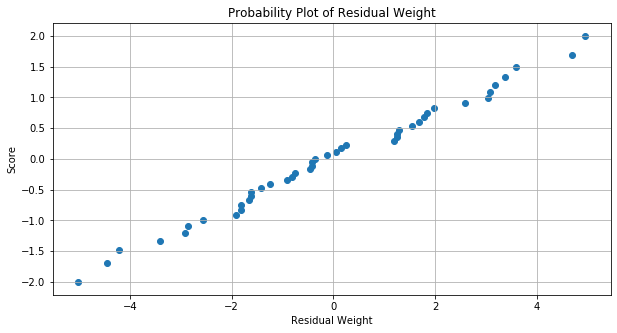

In [7]:
# Creating a normal scores plot

plt.figure(figsize=(10,5))
plt.scatter(x=residuals, y=scores)
plt.title('Probability Plot of Residual Weight')
plt.ylabel('Score')
plt.xlabel('Residual Weight')
plt.grid();

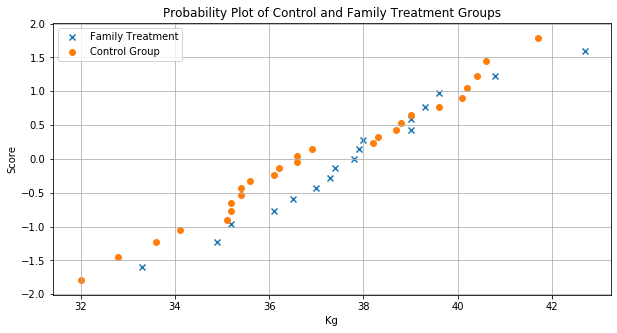

In [18]:
# Comparing spread using a normal scores plot
ft_scores = stats.norm.ppf(np.arange(1,ft.shape[0]+1,1)/(ft.shape[0]+1))
c_scores = stats.norm.ppf(np.arange(1,c.shape[0]+1,1)/(c.shape[0]+1))

# Plotting a normal scores plot for each group
plt.figure(figsize=(10,5))
plt.scatter(x=np.sort(ft), y=ft_scores, marker='x')
plt.scatter(x=np.sort(c), y=c_scores)
plt.grid()
plt.legend(['Family Treatment','Control Group'])
plt.title('Probability Plot of Control and Family Treatment Groups')
plt.xlabel('Kg')
plt.ylabel('Score');

While means are different, the boxplots considerably overlap so the difference might not be statistically significant. We'll test for mean equality.<br>
$t=\frac{\bar{y}_1-\bar{y}_2}{S\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$ where $S=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$

In [49]:
# Testing for mean equality
n2 = ft.shape[0]
n1 = c.shape[0]
y2 = ft.mean()
y1 = c.mean()
s2 = ft.std(ddof=1)
s1 = c.std(ddof=1)

S = ((((n1-1)*(s1**2))+((n2-1)*(s2**2)))/(n1+n2-2))**(1/2)
t = (y1-y2)/(S*(((1/n1)+(1/n2))**(1/2)))
p_value = stats.t.sf(-t, df = 41)*2

print(f'Pooled variance = {S}')
print(f't statistic = {t}')
print(f'p-value = {p_value}')

Pooled variance = 2.4716746524742046
t statistic = -0.9567113665457804
p-value = 0.3443204888090676


The two-tailed p-value is 0.34 providing insufficient evidence to reject the null hypothesis. This means the weights in the control and treatment groups could be the same.

### Two-sample unpooled t-test

Consider the tonnages of the 25 British merchant ships in 1907 which were reported by Floud (1973) and listed in Homework Problem 6.8. Of the 25 ships, 4 were sailing ships and 16 were steam ships, the remainder having an unknown source of power. Let’s suppose we wish to determine whether steam ships have higher tonnages, on average, than sailing ships. Listed below are the tonnages of these 20 ships:

Steam: 739 970 2371 309 679 1272 3246 1904 357 1080 1027 2507 502 1501 2750 192

Sail:	236	26	28	138

In [5]:
# Data entry
steam = np.array([float(i) for i in '739 970 2371 309 679 1272 3246 1904 357 1080 1027 2507 502 1501 2750 192'.split(' ')])
sail = np.array([float(i) for i in '236 26 28 138'.split(' ')])

In [35]:
df = pd.merge(pd.DataFrame(steam, columns=['steam']).describe(),pd.DataFrame(sail, columns=['sail']).describe(), 
              left_index=True, right_index=True)
df

,steam,sail
count,16.000000,4.000000
mean,1337.875000,107.000000
std,950.240101,100.671082
min,192.000000,26.000000
25%,634.750000,27.500000
50%,1053.500000,83.000000
75%,2020.750000,162.500000
max,3246.000000,236.000000


Given that the steam group standard deviation is over twice that of the sail group we need to use unpooled t-test.

$$t = \frac{\bar{y}_1-\bar{y}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

with degrees for freedom equal to

$$v = \frac{(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2})^2}{\frac{(\frac{s_1^2}{n_1})^2}{n_1-1}+\frac{(\frac{s_2^2}{n_2})^2}{n_2-1}}$$

In [37]:
t = df.loc['mean','steam']

1337.875

In [57]:
# Calculate t-statistic and degrees of freedom

t = (df.loc['mean','steam']-df.loc['mean','sail'])/\
((df.loc['std','steam']**2/df.loc['count','steam'])+(df.loc['std','sail']**2/df.loc['count','sail']))**(1/2)
v = ((df.loc['std','steam']/df.loc['count','steam'])+(df.loc['std','sail']/df.loc['count','sail']))**2/\
((((df.loc['std','steam']/df.loc['count','steam'])**2)/(df.loc['count','steam']-1))+\
(((df.loc['std','sail']/df.loc['count','sail'])**2)/(df.loc['count','sail']-1)))
print(f't-statistic = {t:.4f}')
print(f'v = {round(v+.05)}')

# Calculating p-value
print(f'p-value = {stats.t.sf(t, df=v)}')

t-statistic = 5.0688
v = 16.0
p-value = 5.67443342250425e-05


### Paired sample t-test

Consider a study involving 15 hypertensive patients reported by McGregor et al (1979) and analysed by Cox & Snell (1981). Each subject’s diastolic blood pressure was measured before and two hours after treatment with captopril, a drug designed to reduce high blood pressure.

In [8]:
before = np.array([float(i) for i in '130 122 124 104 112 101 121 124 115 102 98 119 106 107 100'.split(' ')])
after = np.array([float(i) for i in '125 121 121 106 101 85 98 105 103 98 90 98 110 103 82'.split(' ')])
df = pd.DataFrame({'before':before,'after':after})
df

,before,after
0,130.0,125.0
1,122.0,121.0
2,124.0,121.0
3,104.0,106.0
4,112.0,101.0
5,101.0,85.0
6,121.0,98.0
7,124.0,105.0
8,115.0,103.0
9,102.0,98.0


$$H_0: \mu_d = 0$$
$$H_1: \mu_d > 0$$

$$t = \frac{\bar{y}_d}{\frac{s_d}{\sqrt{n}}}$$

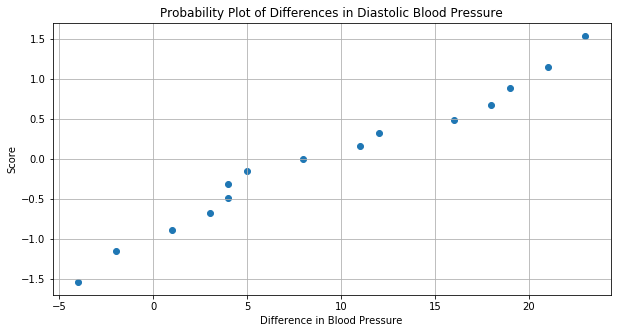

In [18]:
# Testing normality assumption with a normal scores plot

difference = np.sort(df.before-df.after)

# Scores
scores = stats.norm.ppf(q=np.arange(1,difference.shape[0]+1,1)/(difference.shape[0]+1))

# Normal scores plot
plt.figure(figsize=(10,5))
plt.scatter(x=difference, y=scores)
plt.grid()
plt.title('Probability Plot of Differences in Diastolic Blood Pressure')
plt.xlabel('Difference in Blood Pressure')
plt.ylabel('Score');


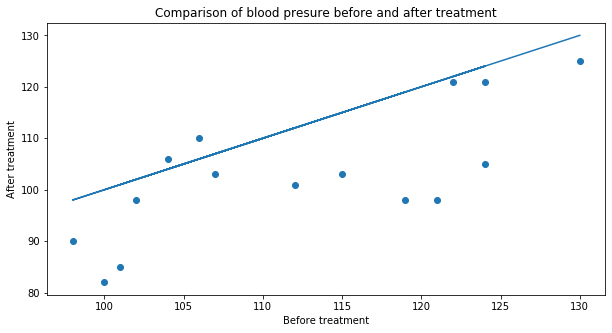

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(df.before, df.after)
plt.plot(df.before, df.before)
plt.title('Comparison of blood presure before and after treatment')
plt.xlabel('Before treatment')
plt.ylabel('After treatment');

Most of the observations are below the before treatment mark. This would point that the treatment is effective.

In [62]:
# Calculate differences
y_d = df['before']-df['after']
my_d = y_d.mean()
s_d = y_d.std(ddof=1)
t = my_d/(s_d/(df.shape[0])**(1/2))

print(f'p-value = {stats.t.sf(t, df = df.shape[0]-1)}')

p-value = 0.0004755449448966595


Given the p-value obtained we can reject the null hypothesis in favour of the alternative hypothesis. This is in line with our observations from the graph above.

### Comparing two proportions

A question of interest is ‘do women have more severe injuries than men?’ Of 505 knee injuries reported at Perisher Resort in the season, 197 were sustained by men and 308 by women. Among the men, 40 injuries were classified as serious, compared to 75 serious injuries among the women.

$H_0: \pi_1=\pi_2$

$H_1: \pi_1<\pi_2$

$z = \frac{p_1 - p_2}{\sqrt{\bar{p}(1-\bar{p})}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$

where $\bar{p}$ is the pooled sample proportion defined as

$\bar{p} = \frac{n_1P_1+n_2P_2}{n_1+n_2}$

The expected number of events and non-events: $n_1\bar{p}$, $n_2\bar{p}$, $n_1(1-\bar{p})$, $n_2(1-\bar{p})$ should be greater than five for the formulas to apply.

In [6]:
# Calculate pooled sample proportion and expected number of events and non-events
n1=197
n2=308
p1=40/n1
p2=75/n2
pp=((n1*p1)+(n2*p2))/(n1+n2)

print(f'Expected number of events and non-events: {n1*pp, n2*pp, n1*(1-pp), n2*1-pp}')

Expected number of events and non-events: (44.86138613861386, 70.13861386138615, 152.13861386138615, 307.7722772277228)


Given that all expected number of events and non-events is greater than five, we can continue with the analysis as the CLT would hold.

In [8]:
# Calculate z-statistic and p-value
z = (p1-p2)/(((pp*(1-pp))**(1/2))*(((1/n1)+(1/n2))**(1/2)))
p_value = stats.norm.sf(abs(z))

print(f'Z statistic = {z:.4f}')
print(f'p-value = {p_value:.4f}')

Z statistic = -1.0576
p-value = 0.1451


### Paired proportions test

Sleigh et al (1982) reported a study to compare two methods (Kato-Katz and Bell) for detecting eggs from faeces samples. Each of 315 infected samples was divided into two halves, and the halves were tested using the different methods.

<table>
    <tr>
        <td></td>
        <td></td>
        <td colspan='3'>Kato-Katz Method</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td>+</td>
        <td>-</td>
        <td>Total</td>
    </tr>
    <tr>
        <td rowspan=3>Bell Method</td>
        <td>+</td>
        <td>184</td>
        <td>54</td>
        <td>238</td>
    </tr>
    <tr>
        <td>-</td>
        <td>14</td>
        <td>63</td>
        <td>77</td>
    </tr>
    <tr>
        <td>Total</td>
        <td>198</td>
        <td>117</td>
        <td>315</td>
    </tr>
</table>

Hypotheses:

$H_0: \pi_1-\pi_2=0$

$H_1: \pi_1-\pi_2\neq0$

Test:

$z = \frac{m_1-m_2}{\sqrt{m_1+m_2}}$


In [9]:
# Calculate the proportions
kkp = 198/315
bp = 238/315

print(f'Kato-Katz method success = {kkp:.3f}')
print(f'Bell method success = {bp:.3f}')

Kato-Katz method success = 0.629
Bell method success = 0.756


In [12]:
# Calculate discordant pairs
m1 = 54
m2 = 14

z = (m1-m2)/math.sqrt(m1+m2)
p_value = stats.norm.sf(abs(z))

print(f'Z statistic = {z:.4f}')
print(f'p-value = {p_value}')

Z statistic = 4.8507
p-value = 6.150937717279326e-07


Given the observed p-value, it is reasonable to reject the null hypothesis and conclude that the Bell method is more sensitive.

## Homework

### Problem 1

The local court appearances for a number of areas in Sydney were reported in the Sydney Morning Herald on 20 May 1993 as rates per 100,000. Randomly selected samples from northern and southern suburbs are listed as follows:

- Northern Suburbs
  - Manly 1997
  - Willoughby 1091 
  - North Sydney 1246 
  - Warringah 1633 
  - Wyong 2318
  - Blacktown 1925
  - Lane Cove 815
- Southern Suburbs
  - Rockdale 1578 
  - Strathfield 1188 
  - Botany 1839 
  - Hurstville 1434 
  - Sutherland 1492 
  - Fairfield 1821

a. Graph these data and comment on the display.

In [45]:
# Data
ns = np.array([1997.0, 1091.0, 1246.0, 1633.0, 2318.0, 1925.0, 815.0])
ns_name = ['Manly', 'Willoughby', 'NorthSydney', 'Warringah', 'Wyong',
           'Blacktown', 'LaneCove']
ss_name = ['Rockdale', 'Strathfield', 'Botany', 'Hurstville', 'Sutherland', 
           'Fairfield']
ss = np.array([1578.0, 1188.0, 1839.0, 1434.0, 1492.0, 1821.0])

Northern Suburbs median: 1633.0
Southern Suburbs median: 1535.0


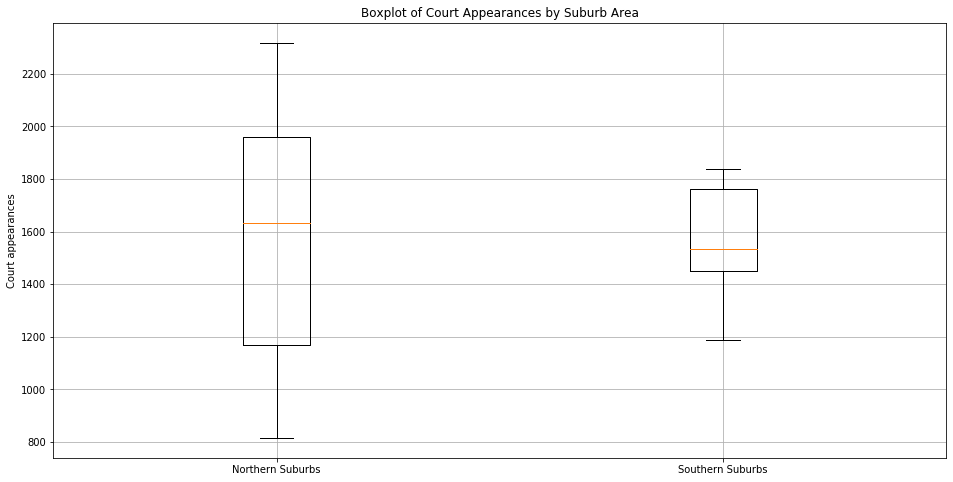

In [51]:
# Create boxplot
fig, ax = plt.subplots(figsize=(16,8))

ax.boxplot([ns,ss])
ax.set_xticklabels(['Northern Suburbs','Southern Suburbs'])
ax.grid()
ax.set_ylabel('Court appearances')
ax.set_title('Boxplot of Court Appearances by Suburb Area');

print(f'Northern Suburbs median: {np.median(ns)}')
print(f'Southern Suburbs median: {np.median(ss)}')

The median court appearances for both groups is similar with Northern Suburbs having more appearances. However the spread of the Northern Suburbs appearances is larger than that of the Southern Suburbs.

b. Is there evidence of a difference in the court appearance rates between the northern and southern suburbs?

$H_0: \mu_n=\mu_s$ <br>
$H_1: \mu_n\ne\mu_s$

In [12]:
# Checking for equality of variance
ns.std(ddof=1)/ss.std(ddof=1)

2.202312895722901

Given that the standard deviation of one sample is over twice the other, we will use an unpooled t-test

$t = \frac{\bar{y}_1-\bar{y}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

with degrees for freedom equal to

$v = \frac{\left ( \frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right ) ^2}{\frac{\left ( \frac{s_1^2}{n_1}\right ) ^2}{n_1-1}+\frac{\left ( \frac{s_2^2}{n_2}\right ) ^2}{n_2-1}}$

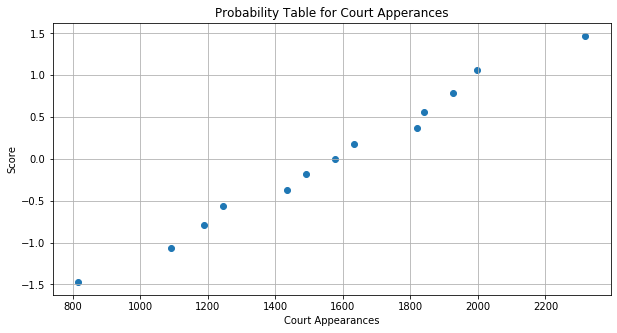

In [58]:
# Checking for normality assumption with a normal scores plot
data = np.concatenate([ns,ss])
data.sort()
scores = stats.norm.ppf(np.arange(1,data.shape[0]+1,1)/(data.shape[0]+1))

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=data,y=scores)
ax.grid()
ax.set_title('Probability Table for Court Apperances')
ax.set_xlabel('Court Appearances')
ax.set_ylabel('Score');

Normality assumption has been met.

In [33]:
y1 = ns.mean()
y2 = ss.mean()
s1 = ns.std(ddof=1)
s2 = ss.std(ddof=1)
n1 = ns.shape[0]
n2 = ss.shape[0]

t = (y1-y2)/math.sqrt((s1**2/n1)+(s2**2/n2))
v = (((s1**2/n1)+(s2**2/n2))**2)/((s1**2/n1)**2/(n1-1)+(s2**2/n2)**2/(n2-1))
p_value = stats.t.sf(t, df=v)
print(f't-statistic = {t}')
print(f'degrees of freedom = {v}')
print(f'p-value = {p_value}')

t-statistic = 0.07131172981165101
degrees of freedom = 8.63416291174828
p-value = 0.4723870164974864


There is insufficient evidence to reject the null hypothesis. The average number of court appearances on both courts is roughtly equal.

### Problem 2

Gastwirth (1988, page 526) presented the results of a random roadside survey of young male and female drivers in Oklahoma. In this survey, of 619 drivers under 20, 77 out of 404 men and 16 out of 122 women responded that they had consumed alcohol during the previous 2 hours.

<table>
    <tr>
        <td><td>
        <td>D<td>
        <td>ND<td>
        <td>Total<td>
    </tr>
    <tr>
        <td>Men<td>
        <td>77<td>
        <td>327<td>
        <td>404<td>
    </tr>
    <tr>
        <td>Women<td>
        <td>16<td>
        <td>106<td>
        <td>122<td>
    </tr>
    <tr>
        <td>Total<td>
        <td>93<td>
        <td>433<td>
        <td>526<td>
    </tr>
</table>

In [2]:
# Data
n = 526
m = 404
w = 122
dm = 77
dw = 16

a. Calculate the proportions of men and women drinkers.

In [3]:
# Proportion of drinkers per group
pdm = dm/m
pdw = dw/w

print(f'Proportion of drinking men = {pdm:.3f}')
print(f'Proportion of drinking women = {pdw:.3f}')

Proportion of drinking men = 0.191
Proportion of drinking women = 0.131


b. Compare these proportions using an appropriate hypothesis test.

$H_0: \pi_m=\pi_w$<br>
$H_1: \pi_m\neq\pi_w$

$z = \frac{p_1 - p_2}{\sqrt{\bar{p}(1-\bar{p})}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$

where $\bar{p}$ is the pooled sample proportion defined as

$\bar{p} = \frac{n_1P_1+n_2P_2}{n_1+n_2}$

The expected number of events and non-events: $n_1\bar{p}$, $n_2\bar{p}$, $n_1(1-\bar{p})$, $n_2(1-\bar{p})$ should be greater than five for the formulas to apply.

In [4]:
# Checking for number of events and non-events greater than 5
pp = (m*pdm+w*pdw)/(m+w)

m*pp, w*pp, m*(1-pp), w*(1-pp)

(71.42965779467681, 21.570342205323197, 332.5703422053232, 100.4296577946768)

In [5]:
# Comparing proportions
z = (pdm-pdw)/(math.sqrt(pp*(1-pp))*math.sqrt((1/m)+(1/w)))
p_value = stats.norm.sf(abs(z))*2

print(f'z-stat = {z}')
print(f'p-value = {p_value}')

z-stat = 1.508358142560457
p-value = 0.13146288977830156


There is insufficient evidence to reject the null hypothesis. This means that the proportion of drinkers is similar for both groups.

c. Graph 95% confidence intervals for the two population proportions, and comment on this graph in relation to the decision in part b.

Computing a confidence interval (normally 95%) from a population proportion:

$\left ( p-t_{n-1} \sqrt{\frac{p(1-p)}{n}},p+t_{n-1} \sqrt{\frac{p(1-p)}{n}} \right )$

Where $p$ is the sample proportion and $n$ is the sample size. This approximation improves as $n$ increases, and is not valid unles both $np$ and $n(1-p) \ge 5$

95% CI for p(m) = (0.152,0.229)
95% CI for p(w) = (0.071,0.192)


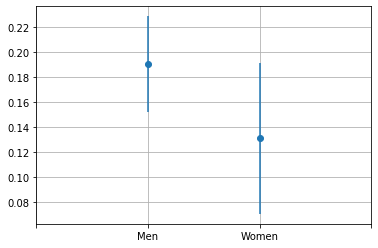

In [12]:
alpha = .95

mdiff = -stats.t.ppf((1-alpha)/2, df = m-1) * math.sqrt((pdm*(1-pdm))/m)
wdiff = -stats.t.ppf((1-alpha)/2, df = w-1) * math.sqrt((pdw*(1-pdw))/w)

mlb, mub = pdm-mdiff, pdm+mdiff
wlb, wub = pdw-wdiff, pdw+wdiff

print(f'95% CI for p(m) = ({mlb:.3f},{mub:.3f})')
print(f'95% CI for p(w) = ({wlb:.3f},{wub:.3f})')

#plt.scatter(x = [1,1, 2, 2], y = [mlb, mub, wlb, wub])

plt.errorbar(x = [1,2], y=[pdm, pdw], yerr = [mdiff, wdiff], fmt = 'o')
plt.xticks(ticks=[0,1,2,3],labels=['','Men','Women'])
plt.grid();

### Problem 3

A study conducted by Warton & Goodnow (1991) sought to determine children’s attitudes to responsibility in terms of jobs around the house. Children aged 8, 11 and 14 years of age were asked to comment on the fairness of various work arrangements. The measurement recorded is the percentage of children who undertook each of 13 tasks, rather than leaving it to another family member.

In [2]:
tasks = ['Tidy own things', 'Make own breakfast', 'Make own bed', 
         'Pick up dirty clothes', 'Clear away dishes', 'Take out garbage', 
         'Do dishes/dishwasher', 'Hang out washing', 'Set table', 
         'Bring in paper/mail', 'Wash car', 'Vacuum a room', 
         'Tidy others’ things']

g8 = np.array([100, 87, 93, 80, 87, 40, 40, 40, 53, 47, 20, 27, 33])
g11 = np.array([100, 100, 93, 87, 93, 47, 20, 33, 33, 47, 40, 20, 13])
g14 = np.array([100,95,95,91,95,32,41,41,37,32,32,27,0])

b8, b11, b14 = [],[],[]
x=0
tl = [int(n) for n in '100 100 100 80 73 82 60 67 95 87 67 87 53 73 73 53 47 64 40 47 41 60 53 50 80 40 27 47 53 32 53 47 45 33 40 45 33 27 23'.split(' ')]
print(len(tl))
for i in tl:
    x+=1
 
    if x>3:
        x=1
        
    if x==1:
        b8.append(i)
    elif x==2:
        b11.append(i)
    elif x==3:
        b14.append(i)

b8 = np.array(b8)
b11 = np.array(b11)
b14 = np.array(b14)

len(tasks), g8.shape, g11.shape, g14.shape, b8.shape, b11.shape, b14.shape
    
        

39


(13, (13,), (13,), (13,), (13,), (13,), (13,))

a. Is there evidence of a difference between 14 year-old boys and girls in terms of their willingness to do these tasks?

$t = \frac{\bar{y}_d}{\frac{s_d}{\sqrt{n}}}$

In [5]:
yd = g14.mean()-b14.mean()
sd = (g14-b14).std(ddof=1)
n=g14.shape[0]

t = yd/(sd/math.sqrt(n))
p_value = stats.t.sf(abs(t), df=n-1)

print(f'Parameters: d = {yd:.4f}, sd = {sd:.4f}, n = {n}')
print(f't-statistic = {t}')
print(f'p-value = {p_value}')

Parameters: d = -3.5385, sd = 15.0920, n = 13
t-statistic = -0.8453540311772877
p-value = 0.20722561057351851


There's no evidence to suggest a difference in the willingness to complete these tasks.

b. Do the percentages of 8 year-old and 11 year-old girls willing to do these tasks differ?

$t=\frac{\bar{y}_d}{\frac{s_d}{\sqrt{n}}}$

In [7]:
yd = g8.mean()-g11.mean()
sd = (g8-g11).std(ddof=1)
n=g8.shape[0]

t=yd/(sd/math.sqrt(n))
p_value = stats.t.sf(abs(t),df=n-1)

print(f'Parameters: d = {yd:.4f}, sd = {sd:.4f}, n = {n}')
print(f't-statistic = {t}')
print(f'p-value = {p_value}')

Parameters: d = 1.6154, sd = 12.8032, n = 13
t-statistic = 0.4549121851511202
p-value = 0.3286463544328726


There's no evidence to suggest a difference in the willingness to complete these tasks.

c. Make an appropriate graph of the data used to answer part (b). Do you think that this graph supports the conclusion reached?

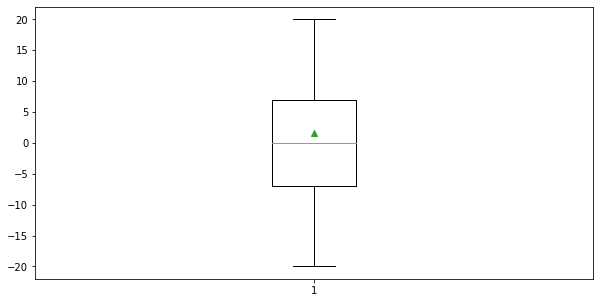

In [11]:
plt.figure(figsize = (10,5))
plt.boxplot(g8-g11, showmeans=True);

### Problem 4

Grizzle, Starmer & Koch (1969) cited a clinical trial in which each of 46 subjects was given two drugs on separate occasions, where each response was recorded simply as either ‘favourable’ or ‘unfavourable’. The results were as follows:

<table>
    <tr>
        <td></td>
        <td colspan=4>Drug A</td>
    </tr>
    <tr>
        <td rowspan=5>Drug B</td>
        <td></td>
        <td>Favourable</td>
        <td>Unfavourable</td>
        <td>Total</td>
    </tr>
    <tr>
        <td>Favourable</td>
        <td>8</td>
        <td>8</td>
        <td>16</td>
    </tr>
    <tr>
        <td>Unfavourable</td>
        <td>20</td>
        <td>10</td>
        <td>30</td>
    </tr>
    <tr>
        <td>Total</td>
        <td>28</td>
        <td>18</td>
        <td>46</td>
    </tr>
</table>

Is there any evidence of a difference between the two drugs? Answer this question after determining a p-value for an appropriate statistical test.

$H_0: \pi_1 - \pi_2 = 0$ <br>
$H_1: \pi_1 - \pi_2 \ne 0$

McNemar test

$z = \frac{m_1-m_2}{\sqrt{m_1+m_2}}$

where $m_1$ and $m_2$ are the discordant pairs of each type


In [6]:
# Calculating the success proportion
z=(20-8)/math.sqrt(20+8)
p_value = stats.norm.sf(abs(z))*2

print(f'z = {z}, p value = {p_value}')

z = 2.2677868380553634, p value = 0.023342202012890816


### Problem 5

Tan & Choo (1990) undertook a study to examine the impact of deep-elaborative versus shallow-reiterative information processing on students’ academic performance. The students were divided into two groups before they took their final examinations in two units (Management Accounting and Accounting Information Systems) at Macquarie University, with the following results: 

<table>
    <tr>
        <td>Group</td>
        <td>Management Accounting</td>
        <td>Information Systems</td>
    </tr>
    <tr>
        <td>Deep Elaborative</td>
        <td>n = 24, mean = 73.08 std.dev. = 6.35 </td>
        <td>n = 20, mean = 74.71 std.dev. = 6.86</td>
    </tr>
    <tr>
        <td>Shallow Reiterative</td>
        <td>n = 24, mean = 58.62 std.dev. = 5.15</td>
        <td> n = 21, mean = 56.20 std.dev. = 11.05 </td>
    </tr>
</table>

a. On the basis of these results, is there evidence of a difference between the results for the two groups?

$H_0: \mu_1-\mu_2 = 0$ <br>
$H_1: \mu_1-\mu_2 \ne 0$

$t=\frac{\bar{y}_1 - \bar{y}_2}{S\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$

Where S is the pooled sample standard deviation calculated as:

$S = \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$

Where the t-statistic has $n_1+n_2-2$ degrees of freedom

In [2]:
# Management accounting test
s = math.sqrt(((23*6.35**2)+(23*5.15**2))/46)
t = (73.08-58.62)/(s*math.sqrt((1/24)+(1/24)))
p_value = stats.t.sf(abs(t),df=46)

print(f't = {t}, p value = {p_value}')

t = 8.664419079050276, p value = 1.5811781370727822e-11


In [3]:
# Information systems test
s = math.sqrt(((19*6.86**2)+(20*11.05**2))/39)
t = (74.71-56.20)/(s*math.sqrt((1/20)+(1/21)))
p_value = stats.t.sf(abs(t),df=39)

print(f't = {t}, p value = {p_value}')

t = 6.405404280132107, p value = 7.087913692196625e-08


b. For those in the ‘shallow reiterative’ group, is the mean score obtained by those taking the Management Accounting examination different from that obtained by those taking the Information Systems examination?

MA standard deviation is les than 2 times IS standard deviation. Unpooled t test to be used

$t = \frac{\bar{y}_1-\bar{y}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

with degrees for freedom equal to

$v = \frac{\left ( \frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right ) ^2}{\frac{\left ( \frac{s_1^2}{n_1}\right ) ^2}{n_1-1}+\frac{\left ( \frac{s_2^2}{n_2}\right ) ^2}{n_2-1}}$

In [7]:
def deg_f(s1,s2,n1,n2):
    a = ((s1**2/n1)+(s2**2/n2))**2
    b = (s1**2/n1)**2
    c = (s2**2/n2)**2
    d = b/(n1-1)
    e = c/(n2-1)
    
    return a/(d+e)

In [8]:
t = (58.62-56.20)/math.sqrt(5.15**2/24 + 11.05**2/21)
df = deg_f(5.15,11.05,24,21)

p_value = stats.t.sf(abs(t),df=df)

print(f't = {t}, df = {df}, p value = {p_value}')

t = 0.9199786080329123, df = 27.462354292015483, p value = 0.18279742750986955


c. Is there any evidence that any of the statistical assumptions are violated?

No, unpooled test should be used for second

### Problem 6

Selvin (2004, Table 2.1) quoted some data from a study carried out in California among 3,154 middle-aged men in 1960-61 to investigate the relation between behaviour pattern and the risk of coronary heart disease. For the 40 heaviest men in the study, 20 were found to exhibit type A behaviour (characterised by urgency, aggression and ambition) while the other 20 exhibited type B behaviour (relaxed, non-competitive and less hurried). Their cholesterol levels, in mg/100 ml, were recorded as follows: 

Type A: 233 291 312 250 246 197 268 224 239 239 254 276 234 181 248 252 202 218 212 325 <br>
Type B: 344 185 263 246 224 212 188 250 148 169 226 175 242 252 153 183 137 202 194 213 

Among heavy middle-aged men in this target population, is cholesterol level related to behaviour type? Answer this question by first making a graph of the data and then computing a p-value for an appropriate statistical test, and then state your conclusion.

$H_0: \mu_A = \mu_B$ <br>
$H_1: \mu_A \ne \mu_B$

In [9]:
a = np.array([float(i) for i in '233 291 312 250 246 197 268 224 239 239 254 276 234 181 248 252 202 218 212 325'.split(' ')])
b = np.array([float(i) for i in '344 185 263 246 224 212 188 250 148 169 226 175 242 252 153 183 137 202 194 213'.split(' ')])

In [10]:
a,b

(array([233., 291., 312., 250., 246., 197., 268., 224., 239., 239., 254.,
        276., 234., 181., 248., 252., 202., 218., 212., 325.]),
 array([344., 185., 263., 246., 224., 212., 188., 250., 148., 169., 226.,
        175., 242., 252., 153., 183., 137., 202., 194., 213.]))

''

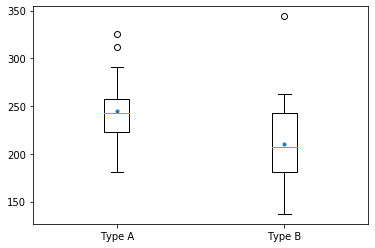

In [37]:
fig, ax = plt.subplots()

ax.boxplot([a,b],labels=['Type A', 'Type B'])
ax.scatter([1,2],[a.mean(),b.mean()],marker='.')
;

In [39]:
# Check assumption for pooled variances
max(a.std(ddof=1),b.std(ddof=1))/min(a.std(ddof=1),b.std(ddof=1))

1.3193816614500926

Text(0.5, 0, 'Scores')

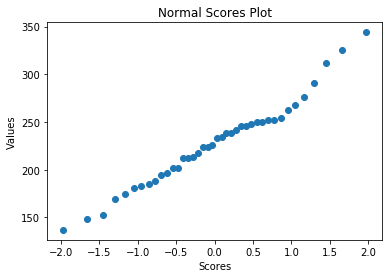

In [61]:
# Check for normality

values = np.concatenate([a,b])
values.sort()
scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

fig, ax = plt.subplots()
ax.scatter(scores,values)
ax.set_title('Normal Scores Plot')
ax.set_ylabel('Values')
ax.set_xlabel('Scores')

Pooled variances t test

$t=\frac{\bar{y}_1 - \bar{y}_2}{S\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$

Where S is the pooled sample standard deviation calculated as:

$S = \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$

Where the t-statistic has $n_1+n_2-2$ degrees of freedom

In [71]:
s = math.sqrt(((a.shape[0]-1)*(a.std(ddof=1)**2)+(b.shape[0]-1)*(b.std(ddof=1)**2))/(a.shape[0]+b.shape[0]-2))
t = (a.mean()-b.mean())/(s*math.sqrt((1/a.shape[0])+(1/b.shape[0])))
p_value = stats.t.sf(abs(t),df=a.shape[0]+b.shape[0]-2)*2

print(f't stat = {t}, df = {a.shape[0]+b.shape[0]-2}, p value = {p_value}')

t stat = 2.5621127281853386, df = 38, p value = 0.014491988612130562


In [72]:
t, p_value = stats.ttest_ind(a,b)
print(f't stat = {t}, p value = {p_value}')

t stat = 2.5621127281853386, p value = 0.014491988612130562


### Problem 7

Hand et al (1994, page 318) have listed data from a study comparing prices of a standard (one-fifth of a US gallon) bottle of Seagram 7 Crown Whisky in different states of the USA in 1961. These states were classified according to whether the liquor stores in the state were privately owned or state monopolised. The prices in US dollars: 

16 monopoly states: <br>
4.55 4.11 4.15 4.20 4.55 3.80 4.00 4.19 4.75 4.74 4.50 4.10 4.00 5.05 5.20 

26 private-ownership states:<br>
4.82 5.29 4.89 4.95 4.55 4.90 5.25 5.30 4.29 4.85 4.54 4.75 4.85 4.85 4.50 4.75 4.79 4.85 4.79 4.95 4.66 4.75 5.20 5.10 4.80 4.29 

Compare these two samples using appropriate statistical methods. 

$H_0: \mu_S = \mu_P$<br>
$H_1: \mu_S \ne \mu_P$

In [76]:
state = np.array([float(i) for i in '4.55 4.11 4.15 4.20 4.55 3.80 4.00 4.19 4.75 4.74 4.50 4.10 4.00 5.05 5.20'.split(' ')])
private = np.array([float(i) for i in '4.82 5.29 4.89 4.95 4.55 4.90 5.25 5.30 4.29 4.85 4.54 4.75 4.85 4.85 4.50 4.75 4.79 4.85 4.79 4.95 4.66 4.75 5.20 5.10 4.80 4.29'.split(' ')])

state.shape, private.shape

((15,), (26,))

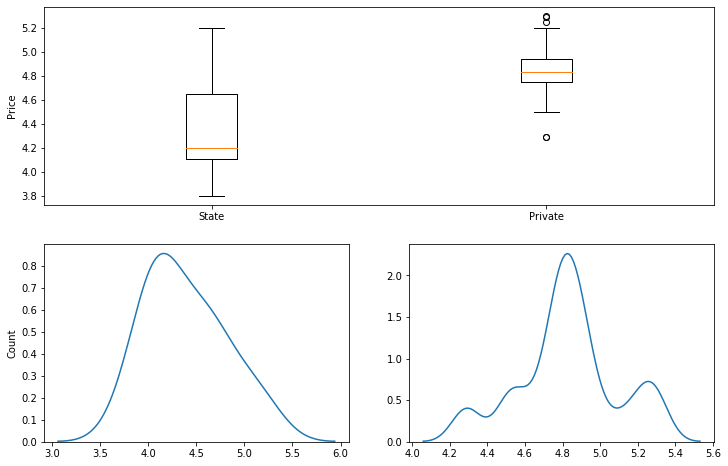

In [126]:
# Visualise data
plt.subplots(2,2, figsize=(12,8))

plt.subplot(2,1,1)
plt.boxplot([state,private],labels=['State','Private']);
plt.ylabel('Price')

plt.subplot(2,2,3)
sns.kdeplot(state)
plt.ylabel('Count')

plt.subplot(2,2,4)
sns.kdeplot(private);

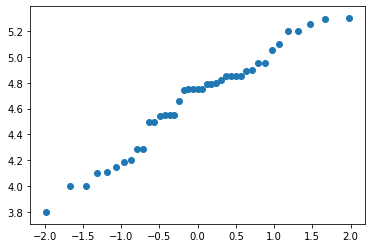

In [127]:
# Check for normality
values = np.concatenate([state,private])
values.sort()
scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

plt.scatter(scores,values)

In [128]:
# Check for equal variance
max(state.std(ddof=1),private.std(ddof=1))/min(state.std(ddof=1),private.std(ddof=1))

1.544042638032973

In [129]:
t, p_value = stats.ttest_ind(state,private)
print(f't stat = {t:.4f}, p_value = {p_value:.4f}')

t stat = -4.1244, p_value = 0.0002


### Problem 8

In the year before the introduction of random breath testing for motorists in a city the number of motor vehicle fatalities in which the driver was found to have been drinking to excess was 163. In the following year the number of such fatalities dropped to 130. Carry out a statistical test to determine whether the rate of such drink- driving fatalities changed. Assume that the population at risk has not changed. 

Hint: Since the size of the population at risk is unknown, assume a large value for it. To what extent does your answer depend on the size of this population?

$H_0: \mu_{y1} = \mu_{y2}$ <br>
$H_1: \mu_{y1} \ne \mu_{y2}$

Z statistic 

$$z = \frac{p_1 - p_2}{\sqrt{\bar{p}(1-\bar{p})}\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

where $\bar{p}$ is the pooled sample proportion defined as

$$\bar{p} = \frac{n_1P_1+n_2P_2}{n_1+n_2}$$

The expected number of events and non-events: $n_1\bar{p}$, $n_2\bar{p}$, $n_1(1-\bar{p})$, $n_2(1-\bar{p})$ should be greater than five for the formulas to apply.

In [177]:
random.seed(101)
n = np.array([random.randint(200,500),random.randint(1000,10000),random.randint(10000,100000),random.randint(10000000,1000000000)])
y1 = 163
y2 = 130

p1 = y1/n
p2 = y2/n

In [178]:
n,p1,p2

(array([      497,      4190,     80677, 395124058]),
 array([3.27967807e-01, 3.89021480e-02, 2.02040235e-03, 4.12528665e-07]),
 array([2.61569416e-01, 3.10262530e-02, 1.61136383e-03, 3.29010591e-07]))

In [179]:
def pooled_proportion(p1,p2,n1,n2):
    return (n1*p1+n1*p2)/(n1+n2)
    
def assumption_check(p, n1, n2):
    return (n1*p>5) & (n2*p>5) & (n1*(1-p)>5) & (n2*(1-p)>5)

def z_test(p1,p2,n1,n2):
    p = pooled_proportion(p1,p2,n1,n2)
    if assumption_check(p,n1,n2):
        return (p1-p2)/(math.sqrt(p*(1-p))*math.sqrt(1/n1+1/n2))
    else:
        return None
    

In [180]:
for y1p,y2p,yn in zip(p1,p2,n):
    z_score = z_test(y1p,y2p,yn,yn)
    print(f'z = {z_score}, p_value = {stats.norm.sf(abs(z_score))*2}')
    

z = 2.2956956585359305, p_value = 0.021693288861960182
z = 1.9624943607126861, p_value = 0.049704956522022004
z = 1.9296333752466033, p_value = 0.053652280413288844
z = 1.9278809422619372, p_value = 0.05386993672893615


### Problem 9

The following table gives estimates of unemployment rates based on sample survey data for September 1992 and December 1992 in various regions in and around Sydney, as reported by the federal Department of Employment, Education and Training and published in the Sydney Morning Herald on 7 May 1993. 

- Regions: Inner Sydney, Inner West, Eastern Suburbs, St George/Sutherland, Canterbury/Bankstown, Fairfield/Liverpool, Outer South-West, Central West, Outer West, Blacktown/Baulkham Hills, Lower North, Hornsby/Ku-Ring-Gai, Manly/Warringah, Gosford/Wyong, Hunter 
- Sept '92: 11 9 6 5 13 17 11 12 8 11 5 6 4 13 12 
- Dec '92: 9 10 6 6 12 21 10 16 7 12 6 8 5 11 13 

a. Graph these data appropriately.

In [8]:
regions = np.array('Inner Sydney, Inner West, Eastern Suburbs, St George/Sutherland, Canterbury/Bankstown, Fairfield/Liverpool, Outer South-West, Central West, Outer West, Blacktown/Baulkham Hills, Lower North, Hornsby/Ku-Ring-Gai, Manly/Warringah, Gosford/Wyong, Hunter'.split(','))
sept92 = np.array([float(i) for i in '11 9 6 5 13 17 11 12 8 11 5 6 4 13 12'.split(' ')])
dec92 = np.array([float(i) for i in '9 10 6 6 12 21 10 16 7 12 6 8 5 11 13'.split(' ')])
unemployment = pd.DataFrame({'sept92':sept92,'dec92':dec92},index=regions)

In [9]:
unemployment.head()

,sept92,dec92
Inner Sydney,11.0,9.0
Inner West,9.0,10.0
Eastern Suburbs,6.0,6.0
St George/Sutherland,5.0,6.0
Canterbury/Bankstown,13.0,12.0


In [11]:
unemployment['difference'] = unemployment['dec92']-unemployment['sept92']

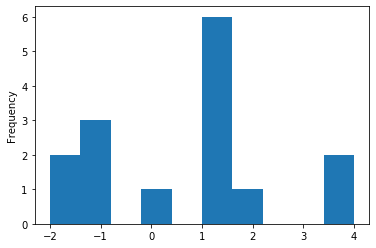

In [17]:
unemployment['difference'].plot(kind='hist')

b. Was there a change in the unemployment rate between the September 1992 and December 1992 quarters? Answer this question using a statistical test, and give a 95% confidence interval for the change. 

$H_0: \mu_{sept}=\mu_{dec}$ <br>
$H_1: \mu_{sept}\ne\mu_{dec}$

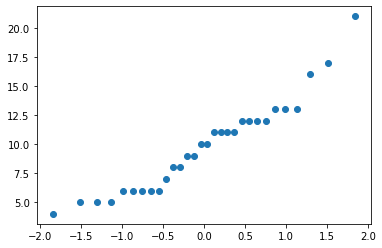

In [19]:
# Testing for normality
values = np.concatenate([sept92,dec92])
values.sort()

scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

plt.scatter(scores,values)

In [21]:
# Test for pooled variances
unemployment.std()

sept92        3.758166
dec92         4.323799
difference    1.843909
dtype: float64

In [23]:
t, p_value = stats.ttest_rel(sept92,dec92)
t,p_value

(-1.260252075625209, 0.22818003635898285)

$\left ( \bar{y}-t_{n-1} \frac{s}{\sqrt{n}},\bar{y}+t_{n-1} \frac{s}{\sqrt{n}} \right )$

Where $\bar{y}$ is the sample mean, $n$ the sample size, $s$ the sample standard deviation and $t_{n-1}$ the critical value. 

In [30]:
unemployment['difference'].mean()

0.6

In [39]:
deviation = abs(stats.t.ppf(.025,df=unemployment['difference'].shape[0]-1))*\
(unemployment['difference'].std(ddof=1)/math.sqrt(unemployment['difference'].shape[0]))

unemployment['difference'].mean()-deviation,unemployment['difference'].mean()+deviation

(-0.42112270841668054, 1.6211227084166806)

### Problem 10

Till (1974, page 104) reported the following three samples of salinity values (in parts per thousand) taken from different water masses in the Bimini Lagoon, Bahamas. 
Compare the salinity values in these three water masses, using methods covered in Chapter 8. 

In [40]:
mass1 = np.array([float(i) for i in '37.54 37.01 36.71 37.03 37.32 37.01 37.03 37.70 36.36 37.75 37.45 38.85'.split(' ')])
mass2 = np.array([float(i) for i in '40.17 40.80 39.76 39.70 40.79 40.44 39.79 39.38'.split(' ')])
mass3 = np.array([float(i) for i in '39.04 39.21 39.05 38.24 38.53 38.71 38.89 38.66 38.51 40.08'.split(' ')])

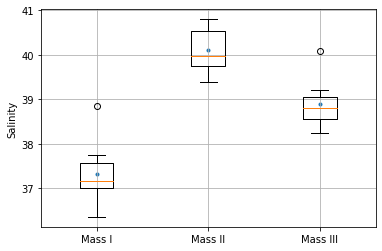

In [46]:
plt.boxplot([mass1,mass2,mass3],labels=['Mass I','Mass II','Mass III'])
plt.scatter([1,2,3],[mass1.mean(),mass2.mean(),mass3.mean()],marker='.')
plt.ylabel('Salinity')
plt.grid()

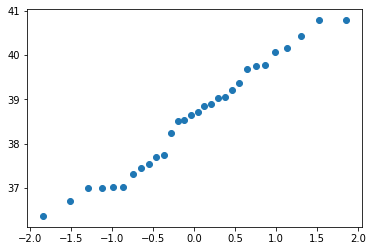

In [50]:
# Normality Check
values = np.concatenate([mass1,mass2,mass3])
values.sort()
scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

plt.scatter(scores,values)

In [55]:
mass1.std(ddof=1),mass2.std(ddof=1),mass3.std(ddof=3)

(0.6316692652061372, 0.5313846468022401, 0.5792063535563118)

$H_0: \mu_{MI} = \mu_{MII}$<br>
$H_1: \mu_{MI} \ne \mu_{MII}$

In [57]:
stats.ttest_ind(mass1,mass2)

Ttest_indResult(statistic=-10.280267327576846, pvalue=5.8268084395292095e-09)

$H_0: \mu_{MI} = \mu_{MIII}$<br>
$H_1: \mu_{MI} \ne \mu_{MIII}$

In [60]:
stats.ttest_ind(mass1,mass3)

Ttest_indResult(statistic=-6.352397905214049, pvalue=3.3681827406640423e-06)

$H_0: \mu_{MII} = \mu_{MIII}$<br>
$H_1: \mu_{MII} \ne \mu_{MIII}$

In [59]:
stats.ttest_ind(mass2,mass3)

Ttest_indResult(statistic=4.913504302463095, pvalue=0.00015587585149787715)

### Problem 11

Suppose you have two alternative routes (A or B, say) for getting from your home to your place of work, and you are not sure which route is quicker. To find the answer, you persuade a colleague who lives near you to join you in an experiment. On the first day you take Route A and your colleague takes Route B, and the next day you take Route B and your colleague takes Route A, continuing in this way for an even number of days. The following times in minutes are recorded after four days: 

In [72]:
travel = pd.DataFrame({'route_a':[37.6,40.5,39.0,40.7],
                       'route_b':[39.0,41.5,39.2,42.6]})
travel['difference'] = travel['route_a'] - travel['route_b']
travel

,route_a,route_b,difference
0,37.6,39.0,-1.4
1,40.5,41.5,-1.0
2,39.0,39.2,-0.2
3,40.7,42.6,-1.9


a. Analyse the data and state your conclusion. 

In [73]:
travel.mean()

route_a       39.450
route_b       40.575
difference    -1.125
dtype: float64

In [63]:
stats.ttest_rel(travel['route_a'],travel['route_b'])

Ttest_relResult(statistic=-3.132764989301094, pvalue=0.05195399384125271)

b. Can you see any problems with this study design? Make some suggestions for improving the efficiency of the experiment. 

Increase sample size